In [124]:
import pandas as pd
import seaborn as sns
import numpy as np


drink = pd.read_csv('drinks.csv')
drink.head()
drink.info()
drink

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


<Axes: >

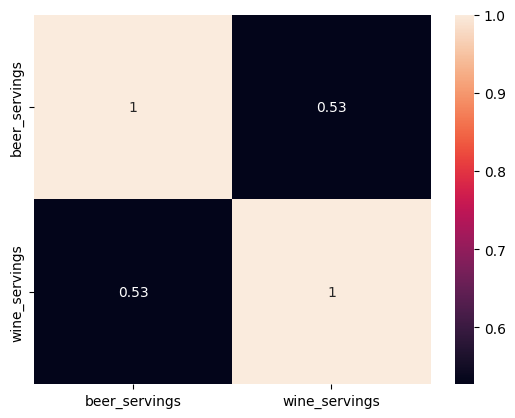

In [125]:
drink[['beer_servings','wine_servings']].corr()
sns.heatmap(drink[['beer_servings','wine_servings']].corr(),annot=True)

<Axes: >

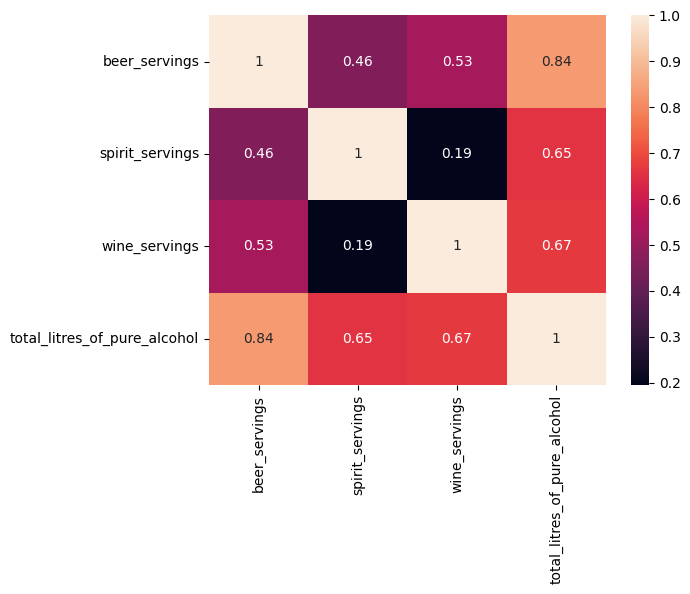

In [126]:
sns.heatmap(drink[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']].corr(),annot=True)

In [127]:
drink.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [128]:
drink['continent'].fillna('OT',inplace=True)

<Axes: ylabel='count'>

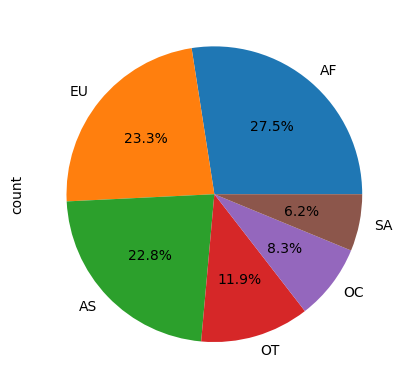

In [129]:
drink['continent'].value_counts().plot.pie(autopct = '%.1f%%')

In [130]:
drink1 = drink.groupby('continent')['spirit_servings'].agg(['mean','min','max','sum']) # 이 기능 개좋은데?ㅋㅋ
drink1

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


<Axes: xlabel='continent'>

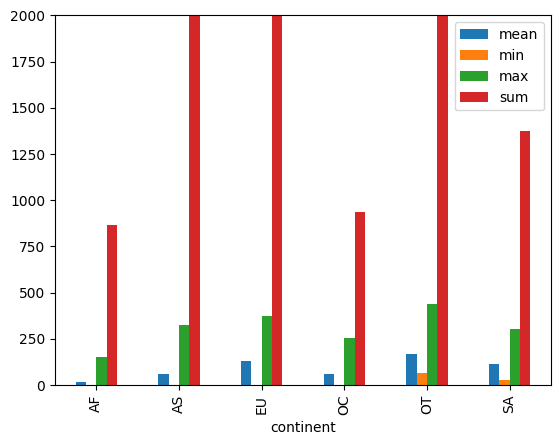

In [131]:
drink1.plot.bar(ylim = (0,2000))


In [132]:
drink2 = drink.groupby('continent')['total_litres_of_pure_alcohol'].mean()

In [133]:
drink2[drink2 > drink['total_litres_of_pure_alcohol'].mean()]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [134]:
drink.groupby('continent')['beer_servings'].mean().idxmax() #평균이 가장 높은 인덱스를 구했음

'EU'

<Axes: xlabel='continent', ylabel='total_litres_of_pure_alcohol'>

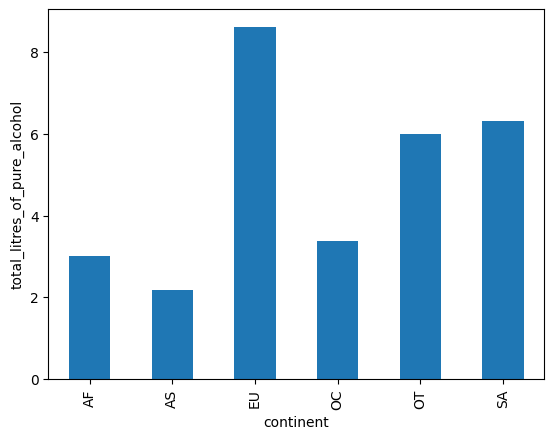

In [135]:
drink2.plot.bar(ylabel = 'total_litres_of_pure_alcohol')

In [136]:
netflix = pd.read_csv('netflix.csv')
netflix.head()
netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       5837 non-null   object
 1   director    3936 non-null   object
 2   date_added  5195 non-null   object
 3   type        5837 non-null   object
dtypes: object(4)
memory usage: 182.5+ KB


title            0
director      1901
date_added     642
type             0
dtype: int64

In [137]:
netflix[netflix['title'] == 'Limitless']

,title,director,date_added,type
1559,Limitless,Neil Burger,16-May-19,Movie
2564,Limitless,NaN,1-Jul-16,TV Show
4579,Limitless,Vrinda Samartha,1-Oct-19,Movie


In [138]:
netflix[(netflix['director'] == 'Robert Rodriguez') & (netflix['type'] == 'Movie')]

,title,director,date_added,type
1384,Spy Kids: All the Time in the World,Robert Rodriguez,19-Feb-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,1-Apr-19,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,8-Mar-19,Movie
2890,Sin City,Robert Rodriguez,1-Oct-19,Movie
3836,Shorts,Robert Rodriguez,1-Jul-19,Movie
3883,Spy Kids,Robert Rodriguez,1-Apr-19,Movie


In [139]:
netflix[(netflix['director'] == 'Robert Rodriguez') | (netflix['date_added'] == '31-Jul-19')]

,title,director,date_added,type
1028,The Red Sea Diving Resort,Gideon Raff,31-Jul-19,Movie
1384,Spy Kids: All the Time in the World,Robert Rodriguez,19-Feb-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,1-Apr-19,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,8-Mar-19,Movie
2890,Sin City,Robert Rodriguez,1-Oct-19,Movie
3473,Bangkok Love Stories: Innocence,NaN,31-Jul-19,TV Show
3836,Shorts,Robert Rodriguez,1-Jul-19,Movie
3883,Spy Kids,Robert Rodriguez,1-Apr-19,Movie
5117,Ramen Shop,Eric Khoo,31-Jul-19,Movie


In [164]:
netflix[((netflix['director'] == 'Robert Rodriguez') | (netflix['director'] == 'Orson Welles')) | (netflix['director'] == 'Sam Raimi')]

,title,director,date_added,type
946,The Stranger,Orson Welles,2018-07-19,Movie
1384,Spy Kids: All the Time in the World,Robert Rodriguez,2019-02-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,2019-04-01,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,2019-03-08,Movie
1870,The Gift,Sam Raimi,2019-11-20,Movie
2890,Sin City,Robert Rodriguez,2019-10-01,Movie
3706,Spider-Man 3,Sam Raimi,2019-11-01,Movie
3836,Shorts,Robert Rodriguez,2019-07-01,Movie
3883,Spy Kids,Robert Rodriguez,2019-04-01,Movie
4475,The Other Side of the Wind,Orson Welles,2018-11-02,Movie


In [141]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix[(netflix['date_added'] >='2019-05-01') & (netflix['date_added'] <='2019-06-01' )]

C:\Users\user\AppData\Local\Temp\ipykernel_19836\2446886003.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix['date_added'] = pd.to_datetime(netflix['date_added'])


,title,director,date_added,type
29,Chopsticks,Sachin Yardi,2019-05-31,Movie
60,Away From Home,NaN,2019-05-08,TV Show
82,III Smoking Barrels,Sanjib Dey,2019-06-01,Movie
108,Jailbirds,NaN,2019-05-10,TV Show
124,Pegasus,Han Han,2019-05-31,Movie
...,...,...,...,...
5671,Satan & Adam,V. Scott Balcerek,2019-06-01,Movie
5675,Rim of the World,McG,2019-05-24,Movie
5677,Malibu Rescue,Savage Steve Holland,2019-05-13,Movie
5739,Mission Istaanbul: Darr Ke Aagey Jeet Hai,Apoorva Lakhia,2019-05-16,Movie


In [167]:
netflix.dropna(subset = ['director'],inplace=True)
netflix.isnull().sum()

title          0
director       0
date_added    35
type           0
dtype: int64

In [169]:
netflix.drop_duplicates(subset=['date_added'],keep=False)


,title,director,date_added,type
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
12,Without Gorky,Cosima Spender,2017-05-31,Movie
30,Anjelah Johnson: Not Fancy,Jay Karas,2015-10-02,Movie
38,One Last Thing,Tim Rouhana,2019-08-25,Movie
66,Mute,Duncan Jones,2018-02-23,Movie
...,...,...,...,...
5776,Planet Earth: The Complete Collection,Alastair Fothergill,2015-04-22,TV Show
5788,Chris Brown: Welcome to My Life,Andrew Sandler,2017-10-07,Movie
5789,A Very Murray Christmas,Sofia Coppola,2015-12-04,Movie
5793,Jerry Before Seinfeld,Michael Bonfiglio,2017-09-19,Movie


In [171]:
africa = drink.loc[drink['continent']=='AF']
europe = drink.loc[drink['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

# p-value ? 가 너무 낮으면 귀무가설이 기각, 값이 0.05~ 0.01 유의확률?


The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


In [172]:
drink['total_servings'] = drink['beer_servings'] + drink['wine_servings'] + drink['spirit_servings']

#술 소비량 대비 알콜 비율 피처를 생성합니다.
drink['alcohol_rate'] = drink['total_litres_of_pure_alcohol'] / drink['total_servings']
drink['alcohol_rate'] = drink['alcohol_rate'].fillna(0)

#순위 정보를 생성합니다.
country_with_rank = drink[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


In [174]:
import matplotlib.pyplot as plt

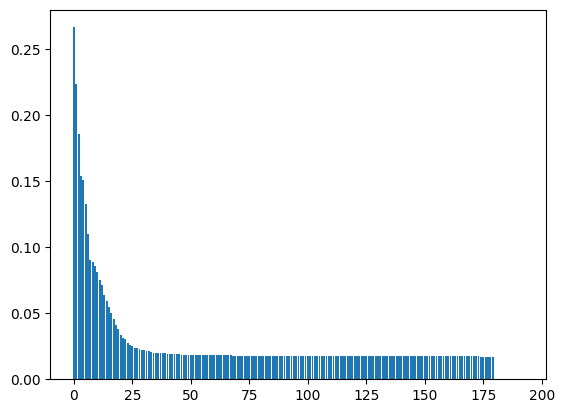

In [175]:
x_pos = np.arange(len(country_with_rank))

rank = country_with_rank["alcohol_rate"]
plt.bar(x_pos,rank)
plt.show()

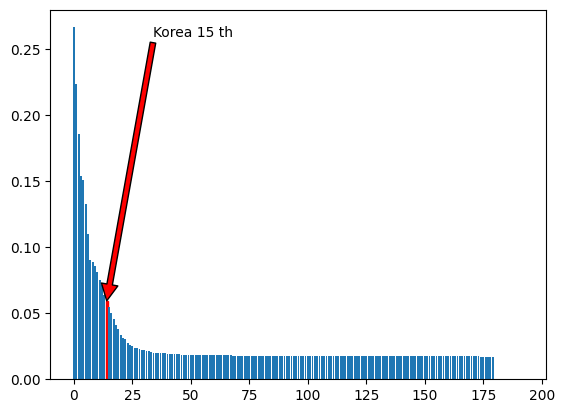

In [192]:
barlist = plt.bar(x_pos,rank)

name  = country_with_rank['country'].tolist()
kor = name.index("South Korea")
barlist[kor].set_color('r')
plt.annotate(f'Korea {kor+1} th', xy=(kor, rank.values[kor]), xytext=(kor+20, rank.values[kor]+0.2), arrowprops={"facecolor": "red"}) 
plt.show()